In [2]:
#importing all necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.manifold import TSNE

In [3]:
#now, we will get the featured-engineered features from the file features.txt
features = list()
with open('UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [4]:
#now, we will get the data from txt files into pandas data frame
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = [features]

#now, we will add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

#now, we will put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
224,0.282021,-0.017590,-0.107934,-0.995237,-0.996592,-0.995152,-0.995527,-0.996552,-0.995840,-0.940793,...,-0.092317,0.171126,-0.893619,0.825290,0.276459,-0.577464,-0.350428,1,6,LAYING
6713,0.276017,-0.017467,-0.112640,-0.992656,-0.993759,-0.992550,-0.994374,-0.993272,-0.992711,-0.933982,...,0.483526,-0.100026,-0.669600,-0.087032,0.467852,-0.565518,-0.427502,29,6,LAYING


In [5]:
#now, we will get the data from txt files to pandas data frame
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = [features]
#now, we will add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None, squeeze=True)

#now, we will get y labels from the txt file
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


#now we will put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1443,0.274059,-0.020362,-0.131241,-0.994011,-0.989675,-0.985977,-0.994515,-0.990812,-0.986981,-0.937607,...,0.009643,0.307975,0.551995,0.698333,0.529103,-0.844710,0.177955,12,6,LAYING
409,0.272434,-0.021555,-0.129240,-0.483910,-0.015636,-0.535280,-0.504506,-0.036967,-0.522606,-0.382798,...,0.155234,0.062255,-0.827045,0.162210,-0.837710,0.166456,-0.075336,4,1,WALKING


In [6]:
train.head


<bound method NDFrame.head of      tBodyAcc-mean()-X tBodyAcc-mean()-Y tBodyAcc-mean()-Z tBodyAcc-std()-X  \
0             0.288585         -0.020294         -0.132905        -0.995279   
1             0.278419         -0.016411         -0.123520        -0.998245   
2             0.279653         -0.019467         -0.113462        -0.995380   
3             0.279174         -0.026201         -0.123283        -0.996091   
4             0.276629         -0.016570         -0.115362        -0.998139   
...                ...               ...               ...              ...   
7347          0.299665         -0.057193         -0.181233        -0.195387   
7348          0.273853         -0.007749         -0.147468        -0.235309   
7349          0.273387         -0.017011         -0.045022        -0.218218   
7350          0.289654         -0.018843         -0.158281        -0.219139   
7351          0.351503         -0.012423         -0.203867        -0.269270   

     tBodyAcc-std()-Y

In [7]:
test.head

<bound method NDFrame.head of      tBodyAcc-mean()-X tBodyAcc-mean()-Y tBodyAcc-mean()-Z tBodyAcc-std()-X  \
0             0.257178         -0.023285         -0.014654        -0.938404   
1             0.286027         -0.013163         -0.119083        -0.975415   
2             0.275485         -0.026050         -0.118152        -0.993819   
3             0.270298         -0.032614         -0.117520        -0.994743   
4             0.274833         -0.027848         -0.129527        -0.993852   
...                ...               ...               ...              ...   
2942          0.310155         -0.053391         -0.099109        -0.287866   
2943          0.363385         -0.039214         -0.105915        -0.305388   
2944          0.349966          0.030077         -0.115788        -0.329638   
2945          0.237594          0.018467         -0.096499        -0.323114   
2946          0.153627         -0.018437         -0.137018        -0.330046   

     tBodyAcc-std()-Y

In [8]:
train.shape


(7352, 564)

In [9]:
test.shape

(2947, 564)

In [10]:
#we will check for duplicates
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

C:\Users\spale\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:2940: PerformanceWarning:

indexing past lexsort depth may impact performance.



No of duplicates in train: 0
No of duplicates in test : 0


In [11]:
#we will check for nan/null values
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [12]:
#we will save test train split into csv files
train.to_csv('UCI HAR Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI HAR Dataset/csv_files/test.csv', index=False)

In [13]:
#we will now look at shape and head of our test/train files
train = pd.read_csv('UCI HAR Dataset/csv_files/train.csv')
test = pd.read_csv('UCI HAR Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [14]:
#some pre-processing
columns = train.columns

#Removing unnecessary '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

<ipython-input-14-a20d1561f761>:5: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-14-a20d1561f761>:6: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-14-a20d1561f761>:7: FutureWarning:

The default value of regex will change from True to False in a future version.



Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

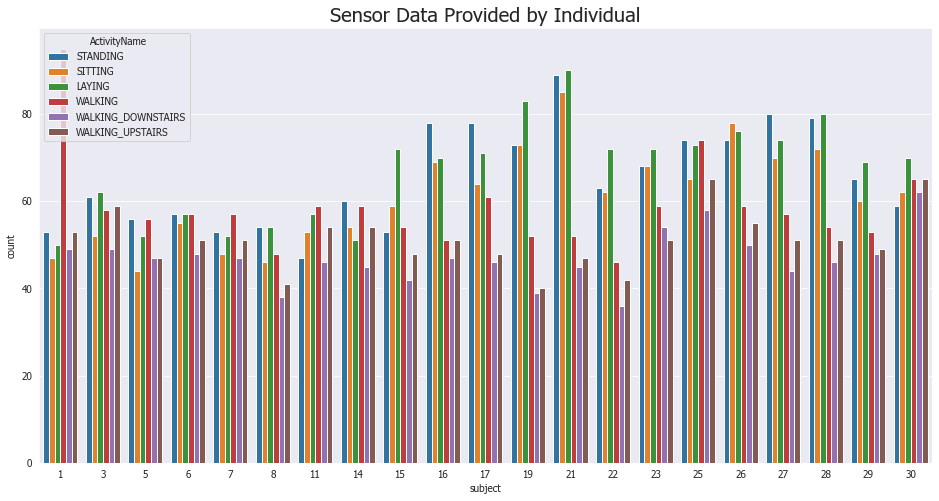

In [15]:
#using matplotlib and seaborn, we will plot the count of activity of all individuals
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'Tahoma'

plt.figure(figsize=(16,8))
plt.title('Sensor Data Provided by Individual', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

In [16]:
#now we will plot the the count of activities
label_counts = train['ActivityName'].value_counts()

#getting colors
n = label_counts.shape[0]
colormap = plt.get_cmap('viridis')
colors = [mlt.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

#creating plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Individual Activity Distribution',
                   xaxis = dict(title = 'ActivityName'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
fig.show()


C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar f

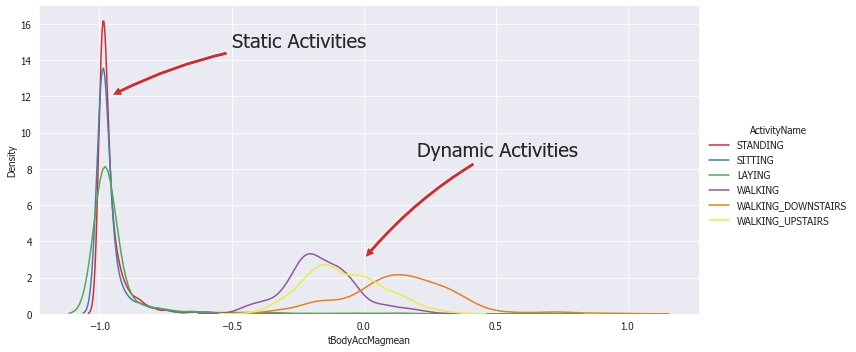

In [17]:
#now we will seperate, static and dynamic activities
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Static Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Dynamic Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar f

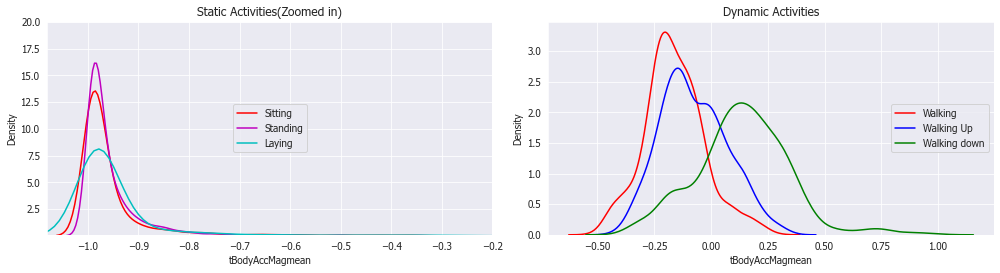

In [18]:
#for concise visualization purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Static Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Dynamic Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

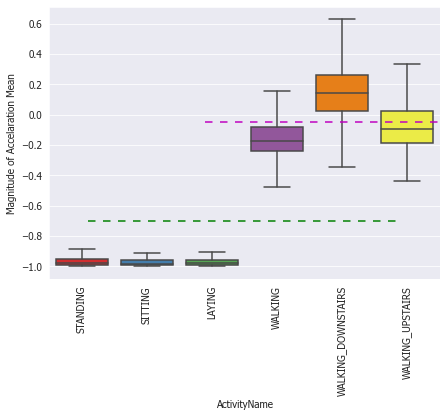

In [19]:
#to elaborate the seperation of static and dynamic activities we will plot some plots
#1 Magnitude of accleration
plt.figure(figsize=(7,5))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Magnitude of Accelaration Mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

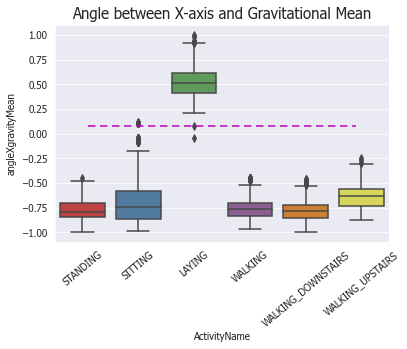

In [20]:
#2 Position of gravitational accelaration components 
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravitational Mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

In [21]:
#Dimensionality Reduction using t-SNE (T-Distributed Stochastic Neighbor Embedding)
#performing t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.007s...


C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 1.934s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597464
[t-SNE] Computed conditional probabilities in 0.030s
[t-SNE] Iteration 50: error = 124.8320312, gradient norm = 0.0260401 (50 iterations in 1.127s)
[t-SNE] Iteration 100: error = 107.5112686, gradient norm = 0.0278401 (50 iterations in 0.968s)
[t-SNE] Iteration 150: error = 101.1291580, gradient norm = 0.0217426 (50 iterations in 0.618s)
[t-SNE] Iteration 200: error = 97.5664902, gra

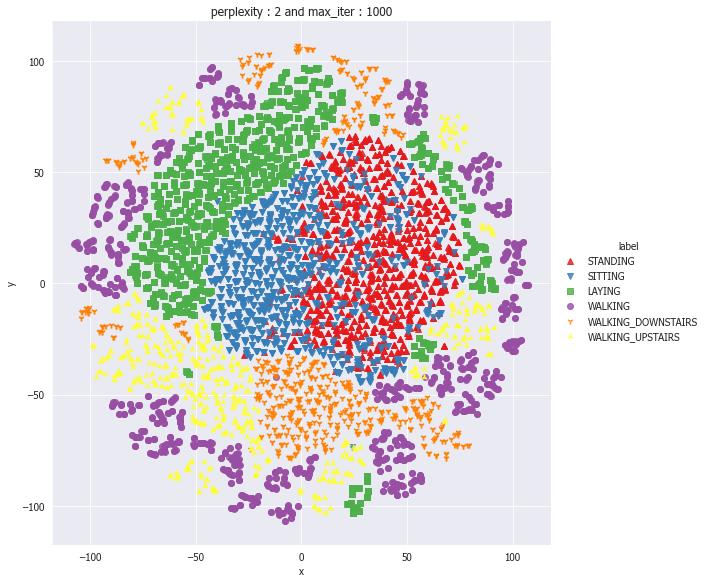

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...


C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 1.179s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.036s
[t-SNE] Iteration 50: error = 114.0576324, gradient norm = 0.0218382 (50 iterations in 1.187s)
[t-SNE] Iteration 100: error = 97.5845947, gradient norm = 0.0186292 (50 iterations in 0.786s)
[t-SNE] Iteration 150: error = 93.2269669, gradient norm = 0.0090967 (50 iterations in 0.686s)
[t-SNE] Iteration 200: error = 91.2627945, gradi

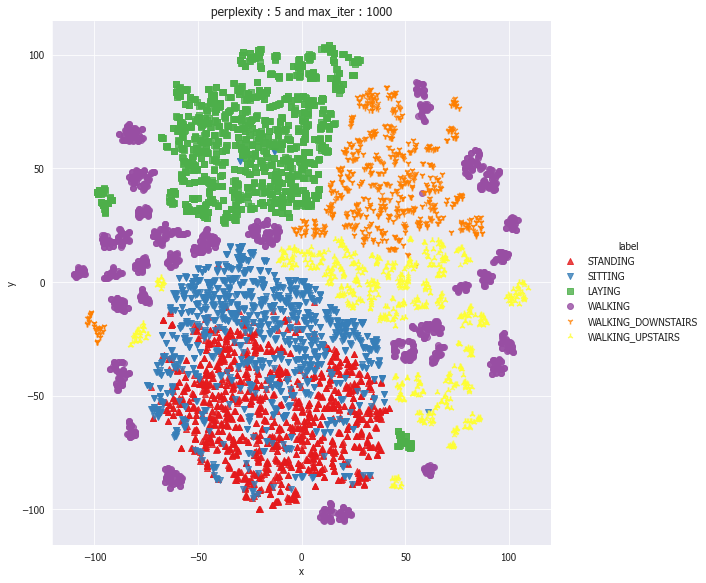

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...


C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 7.450s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.598s
[t-SNE] Iteration 50: error = 105.8401108, gradient norm = 0.0192729 (50 iterations in 9.155s)
[t-SNE] Iteration 100: error = 90.8994141, gradient norm = 0.0103784 (50 iterations in 0.856s)
[t-SNE] Iteration 150: error = 87.5937500, gradient norm = 0.0056373 (50 iterations in 0.778s)
[t-SNE] Iteration 200: error = 86.3195724, gradi

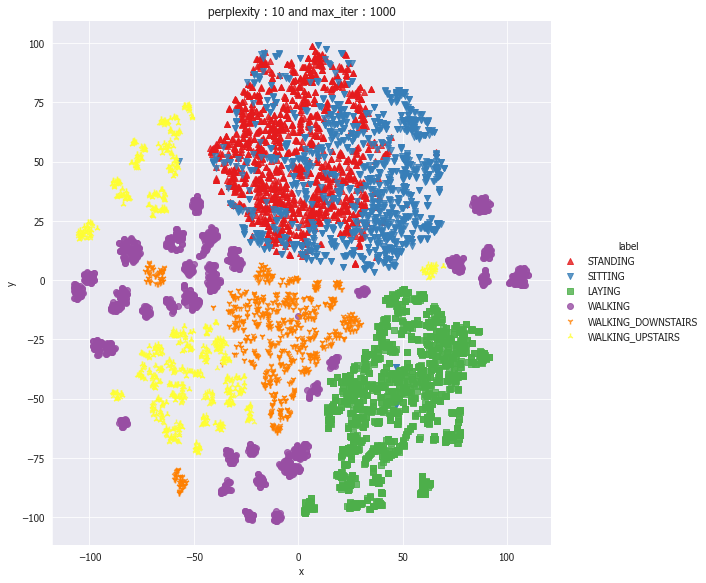

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...


C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 1.185s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.124s
[t-SNE] Iteration 50: error = 97.7908325, gradient norm = 0.0153622 (50 iterations in 1.426s)
[t-SNE] Iteration 100: error = 84.4705963, gradient norm = 0.0070716 (50 iterations in 1.086s)
[t-SNE] Iteration 150: error = 82.3467712, gradient norm = 0.0039527 (50 iterations in 0.873s)
[t-SNE] Iteration 200: error = 81.5417404, gradie

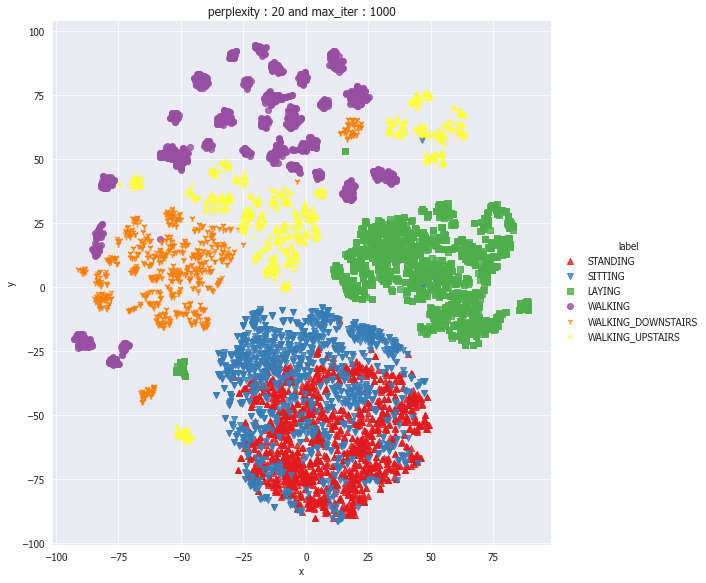

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...


C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\spale\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 7352 samples in 1.311s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.304s
[t-SNE] Iteration 50: error = 86.0870667, gradient norm = 0.0238732 (50 iterations in 1.715s)
[t-SNE] Iteration 100: error = 75.6478500, gradient norm = 0.0040790 (50 iterations in 1.448s)
[t-SNE] Iteration 150: error = 74.6565170, gradient norm = 0.0021402 (50 iterations in 1.406s)
[t-SNE] Iteration 200: error = 74.3035583, gradie

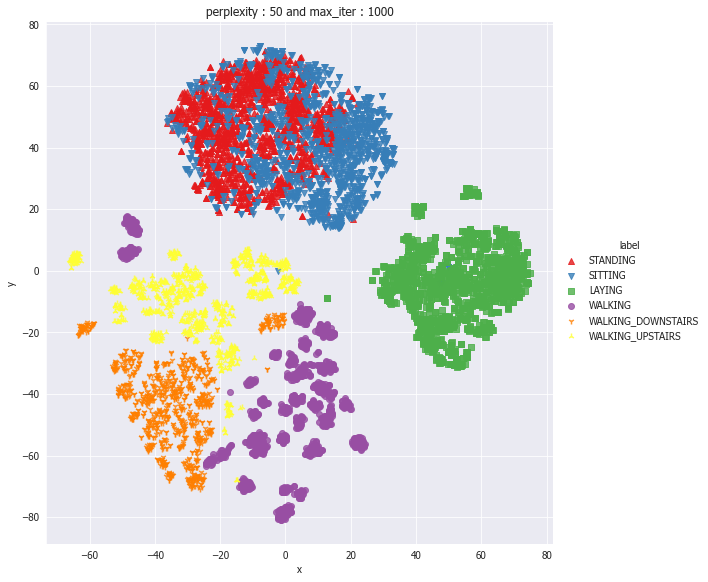

Done


In [22]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

We can see from the above t-SNE plots, all the activities except for standing and sitting are completely seeperated

MACHINE LEARNING ALGORITHMS

In [23]:
#again importing necessary packages and libraries
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
#preparing data for applying machine learning algorithms
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [25]:
#we need these labels for confusion matrix
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [26]:
#we will create a function to plot confusion matrix
plt.rcParams["font.family"] = 'Tahoma'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
#general model specification
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    #now we will store results at various phases
    results = dict()
    
    #the time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    
    #now we predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    #now we calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

    #now we store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
   
    
    
    #confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
        
    #now we will plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    #now we will get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
   
    #now we will store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    #now we will add the trained  model to the results
    results['model'] = model
    
    return results

In [28]:
#now we will create a function to print the gridsearch parameters
def print_grid_search_attributes(model):
    #estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))


    #parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))


    #number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal numbre of cross validation sets: {}'.format(model.n_splits_))


    #average cross validated score of the best estimator, from the Grid Search 
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(model.best_score_))

Logistic Regression with gridsearch

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done....!

==> training time:- 0:00:10.901158

Predicting test data
Done....!

==> testing time:- 0:00:00.007001

==> Accuracy:- 0.9579233118425518


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 428  60   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  23   1 447]]


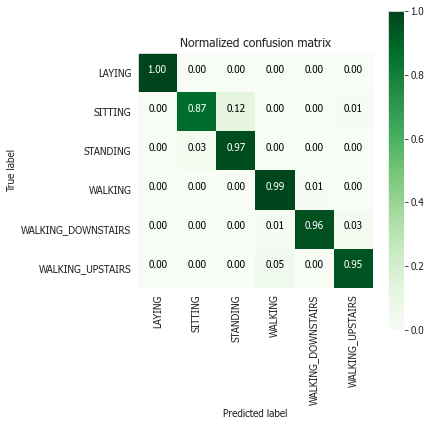

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



==> Best Estimator:
	LogisticRegression(C=1)


==> Best parameters:
	Parameters of best estimator : {'C': 1, 'penalty': 'l2'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9375695606680045


In [29]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

#starting the Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

#now we observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

Linear SVC with Grid Search

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done....!

==> training time:- 0:00:31.080194

Predicting test data
Done....!

==> testing time:- 0:00:00.007990

==> Accuracy:- 0.9667458432304038


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


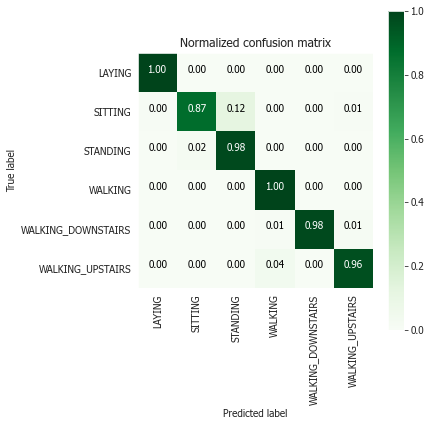

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



==> Best Estimator:
	LinearSVC(C=0.5, tol=5e-05)


==> Best parameters:
	Parameters of best estimator : {'C': 0.5}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9422003634900594


In [30]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

#now we will observe the attributes of the model 
print_grid_search_attributes(lr_svc_grid_results['model'])

Kernel SVM with Grid Search

training the model..
Done....!

==> training time:- 0:04:02.681684

Predicting test data
Done....!

==> testing time:- 0:00:01.345315

==> Accuracy:- 0.9626739056667798


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


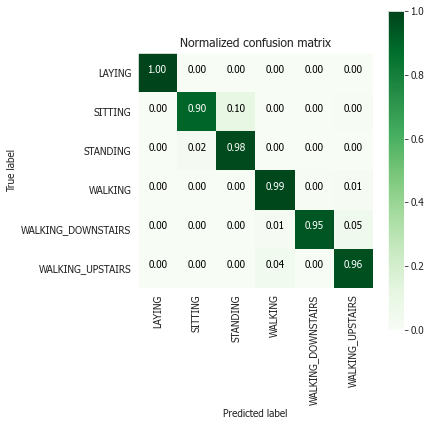

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



==> Best Estimator:
	SVC(C=16, gamma=0.0078125)


==> Best parameters:
	Parameters of best estimator : {'C': 16, 'gamma': 0.0078125}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9447834551903698


In [31]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

#now we will observe the attributes of the model 
print_grid_search_attributes(rbf_svm_grid_results['model'])

Decision Trees with Grid Search

training the model..
Done....!

==> training time:- 0:00:08.902485

Predicting test data
Done....!

==> testing time:- 0:00:00.007019

==> Accuracy:- 0.838140481845945


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 399  92   0   0   0]
 [  0 113 419   0   0   0]
 [  0   0   0 470  10  16]
 [  0   0   0  49 266 105]
 [  0   0   0  86   6 379]]


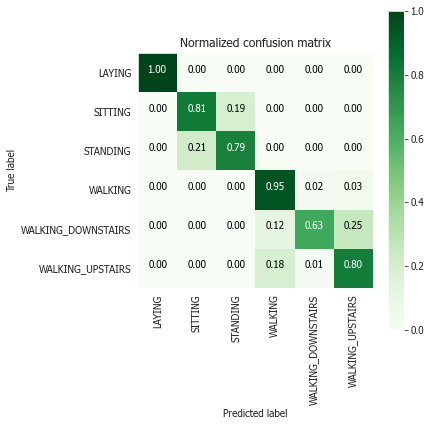

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.78      0.81      0.80       491
          STANDING       0.82      0.79      0.80       532
           WALKING       0.78      0.95      0.85       496
WALKING_DOWNSTAIRS       0.94      0.63      0.76       420
  WALKING_UPSTAIRS       0.76      0.80      0.78       471

          accuracy                           0.84      2947
         macro avg       0.85      0.83      0.83      2947
      weighted avg       0.85      0.84      0.84      2947



==> Best Estimator:
	DecisionTreeClassifier(max_depth=5)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 5}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.8498404065909165


In [32]:
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

#now we will observe the attributes of the model 
print_grid_search_attributes(dt_grid_results['model'])

Random Forest Classifier with Grid Search

training the model..
Done....!

==> training time:- 0:05:11.268757

Predicting test data
Done....!

==> testing time:- 0:00:00.056025

==> Accuracy:- 0.9178825924669155


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 432  59   0   0   0]
 [  0  46 486   0   0   0]
 [  0   0   0 479  10   7]
 [  0   0   0  29 346  45]
 [  0   0   0  40   6 425]]


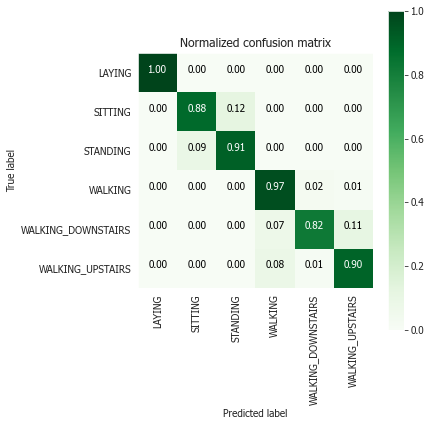

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.88      0.89       491
          STANDING       0.89      0.91      0.90       532
           WALKING       0.87      0.97      0.92       496
WALKING_DOWNSTAIRS       0.96      0.82      0.88       420
  WALKING_UPSTAIRS       0.89      0.90      0.90       471

          accuracy                           0.92      2947
         macro avg       0.92      0.91      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



==> Best Estimator:
	RandomForestClassifier(max_depth=9, n_estimators=150)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 9, 'n_estimators': 150}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9215230510967134


In [33]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

#now we will observe the attributes of the model 
print_grid_search_attributes(rfc_grid_results['model'])

Comparing all Machine Learning models with each other

In [34]:
# ***************************** Print Accuracy and Error ******************************

print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%       {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%       {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%       {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.79%       4.208%
Linear SVC          : 96.67%       3.325% 
rbf SVM classifier  : 96.27%       3.733% 
DecisionTree        : 83.81%       16.19% 
Random Forest       : 91.79%       8.212% 


DEEP NEURAL NETWORKS IMPLEMENTATION

In [35]:
#for Deep Learning implementation, we will use Keras
#importing all the necessasry libraries
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers import BatchNormalization
from keras.regularizers import L1L2

In [36]:
#activities are the class labels
#it iss a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

In [37]:
#preparing data for implementation
#data directory
DATADIR = 'UCI_HAR_Dataset'

#saw data sensor signals are used for deep learning implementation
#signals are from Accelerometer and Gyroscope
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
    ]

In [38]:
#we create a function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

#we create a function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI HAR Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 

    #we use transpose to change the dimensionality of the output,
    #aggregating the signals by combination of sample/timestep.
    #resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [39]:
def load_y(subset):

    filename = f'UCI HAR Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

In [40]:
def load_data():
    
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [41]:
#importing tensorflow
np.random.seed(50)
import tensorflow as tf
tf.random.set_seed(50)

In [65]:
#initializing parameters
epochs = 30
batch_size = 32
n_hidden = 32

In [43]:
#we create a function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [44]:
#loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [45]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


Defining Architecture of LSTM with 1 layer

In [46]:
#initiliazing the sequential model
model = Sequential()

#configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))

#adding a dropout layer
model.add(Dropout(0.7))

#adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5376      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [47]:
#compiling the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [48]:
#training the model
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
230/230 [==============================] - 9s 31ms/step - loss: 1.3930 - accuracy: 0.4075 - val_loss: 1.1649 - val_accuracy: 0.5008
Epoch 2/30
230/230 [==============================] - 7s 28ms/step - loss: 1.0282 - accuracy: 0.5592 - val_loss: 0.8491 - val_accuracy: 0.6216
Epoch 3/30
230/230 [==============================] - 6s 28ms/step - loss: 0.8416 - accuracy: 0.6144 - val_loss: 0.8415 - val_accuracy: 0.5962
Epoch 4/30
230/230 [==============================] - 6s 28ms/step - loss: 0.7799 - accuracy: 0.6412 - val_loss: 0.7491 - val_accuracy: 0.6566
Epoch 5/30
230/230 [==============================] - 6s 28ms/step - loss: 0.7416 - accuracy: 0.6544 - val_loss: 0.7334 - val_accuracy: 0.6827
Epoch 6/30
230/230 [==============================] - 6s 28ms/step - loss: 0.7388 - accuracy: 0.6534 - val_loss: 0.7015 - val_accuracy: 0.7184
Epoch 7/30
230/230 [==============================] - 6s 28ms/step - loss: 0.7782 - accuracy: 0.6711 - val_loss: 0.6776 - val_accuracy: 0.7353

In [49]:
score = model.evaluate(X_test, Y_test)

print("\n   crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)

93/93 [==============================] - 1s 8ms/step - loss: 0.5079 - accuracy: 0.8677

   crossentropy  ||   accuracy 
  ____________________________________
[0.5079137682914734, 0.8676620125770569]


2- Layer LSTM Model with hyperparameter tuning

In [ ]:
#initializing parameters
n_epochs = 30
n_batch = 32
n_classes = _count_classes(Y_train)

#bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)

In [69]:
#model implementation
model = Sequential()
model.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences=True,bias_regularizer=reg ))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(32))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 128, 48)           11136     
                                                                 
 batch_normalization_3 (Batc  (None, 128, 48)          192       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 128, 48)           0         
                                                                 
 lstm_8 (LSTM)               (None, 32)                10368     
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 6)                 198       
                                      

In [70]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [71]:
#training the model
model.fit(X_train, Y_train, batch_size=n_batch, validation_data=(X_test, Y_test), epochs=n_epochs)

Epoch 1/30
230/230 [==============================] - 20s 68ms/step - loss: 1.7816 - accuracy: 0.6549 - val_loss: 1.5831 - val_accuracy: 0.6447
Epoch 2/30
230/230 [==============================] - 15s 66ms/step - loss: 1.0360 - accuracy: 0.8473 - val_loss: 1.0465 - val_accuracy: 0.8079
Epoch 3/30
230/230 [==============================] - 15s 66ms/step - loss: 0.6713 - accuracy: 0.9155 - val_loss: 0.6611 - val_accuracy: 0.8778
Epoch 4/30
230/230 [==============================] - 15s 67ms/step - loss: 0.5184 - accuracy: 0.9123 - val_loss: 0.8343 - val_accuracy: 0.7879
Epoch 5/30
230/230 [==============================] - 15s 67ms/step - loss: 0.3632 - accuracy: 0.9306 - val_loss: 0.4829 - val_accuracy: 0.8880
Epoch 6/30
230/230 [==============================] - 15s 67ms/step - loss: 0.2728 - accuracy: 0.9320 - val_loss: 0.4067 - val_accuracy: 0.8894
Epoch 7/30
230/230 [==============================] - 15s 66ms/step - loss: 0.1961 - accuracy: 0.9423 - val_loss: 0.4562 - val_accuracy:

In [72]:
score = model.evaluate(X_test, Y_test)

print("\n   crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)

93/93 [==============================] - 2s 18ms/step - loss: 0.3764 - accuracy: 0.8884

   crossentropy  ||   accuracy 
  ____________________________________
[0.37639862298965454, 0.8883610367774963]


2 -Layer LSTM with more Hyperparameter tuning

In [55]:
#model implementation
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(48))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128, 64)           18944     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 64)          256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128, 64)           0         
                                                                 
 lstm_4 (LSTM)               (None, 48)                21696     
                                                                 
 dropout_4 (Dropout)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 294       
                                      

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [57]:
#training the model
history = model.fit(X_train, Y_train, batch_size=32, validation_data=(X_test, Y_test), epochs=30)

Epoch 1/30
230/230 [==============================] - 22s 80ms/step - loss: 1.8526 - accuracy: 0.7179 - val_loss: 2.1322 - val_accuracy: 0.5334
Epoch 2/30
230/230 [==============================] - 17s 74ms/step - loss: 1.0785 - accuracy: 0.8966 - val_loss: 0.9582 - val_accuracy: 0.8856
Epoch 3/30
230/230 [==============================] - 20s 86ms/step - loss: 0.7314 - accuracy: 0.9282 - val_loss: 0.8505 - val_accuracy: 0.8212
Epoch 4/30
230/230 [==============================] - 20s 86ms/step - loss: 0.5213 - accuracy: 0.9256 - val_loss: 1.5534 - val_accuracy: 0.5718
Epoch 5/30
230/230 [==============================] - 20s 86ms/step - loss: 0.3643 - accuracy: 0.9317 - val_loss: 0.3819 - val_accuracy: 0.9087
Epoch 6/30
230/230 [==============================] - 18s 78ms/step - loss: 0.2312 - accuracy: 0.9377 - val_loss: 0.2857 - val_accuracy: 0.9125
Epoch 7/30
230/230 [==============================] - 18s 78ms/step - loss: 0.1563 - accuracy: 0.9446 - val_loss: 0.2874 - val_accuracy:

In [58]:
score = model.evaluate(X_test, Y_test)

print("\n   crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)

93/93 [==============================] - 2s 21ms/step - loss: 0.3417 - accuracy: 0.9213

   crossentropy  ||   accuracy 
  ____________________________________
[0.3416588008403778, 0.9212758541107178]


Comparing all models and Conclusion

Comapring Machine Learning Models

In [62]:
#importing prettytable
%pip install prettytable
import prettytable
from prettytable import PrettyTable

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\spale\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [64]:
ptable1 = PrettyTable()
ptable1.title = " Model Comparision "
ptable1.field_names = ['Model Name', 'Accuracy']

print("\n\n ********** Machine Learning Model Comparision ************")
ptable1.add_row(["Logistic Regression","95.79%"])
ptable1.add_row(["Linear SVC  ","96.67%"])
ptable1.add_row(["rbf SVM classifier","96.27%"])
ptable1.add_row(["DecisionTree","87.44%"])
ptable1.add_row(["Random Forest","91.89%"])

print(ptable1)
# *****************************************************************

ptable2 = PrettyTable()
ptable2.title = " Model Comparision "
ptable2.field_names = ['Model Name', 'categorical_crossentropy', 'Accuracy']

print("\n\n ********************************* Deep Learning LSTM Model Comparision ***********************************")
ptable2.add_row(["LSTM With 1_Layer(neurons:32)","0.4785", "0.9195"])
ptable2.add_row(["LSTM With 2_Layer(neurons:48, neurons:32)","0.4", "0.902"])
ptable2.add_row(["LSTM With 2_Layer(neurons:64, neurons:48)","0.34", "0.9213"])

print(ptable2)



 ********** Machine Learning Model Comparision ************
+--------------------------------+
|       Model Comparision        |
+---------------------+----------+
|      Model Name     | Accuracy |
+---------------------+----------+
| Logistic Regression |  95.79%  |
|     Linear SVC      |  96.67%  |
|  rbf SVM classifier |  96.27%  |
|     DecisionTree    |  87.44%  |
|    Random Forest    |  91.89%  |
+---------------------+----------+


 ********************************* Deep Learning LSTM Model Comparision ***********************************
+---------------------------------------------------------------------------------+
|                                Model Comparision                                |
+-------------------------------------------+--------------------------+----------+
|                 Model Name                | categorical_crossentropy | Accuracy |
+-------------------------------------------+--------------------------+----------+
|       LSTM With 1_Lay